<a href="https://colab.research.google.com/github/jiahao20geng/PHAS0102/blob/main/PHAS0102_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Part 1: Solving a wave problem with sparse matrices***

***Write a Python function that takes N as an input and returns the matrix A and vector f.***

In [1]:
import numpy as np
from scipy.sparse import coo_matrix
import math
from scipy.sparse.linalg import spsolve

def discretise_poisson(N):
    nelements = 3*N-4
    h=1/N
    k=29/2*math.pi
    row_ind = np.empty(nelements, dtype=np.float64)
    col_ind = np.empty(nelements, dtype=np.float64)
    data = np.empty(nelements, dtype=np.float64)
    
    f = np.empty(N, dtype=np.float64)
    
    count = 0
    for i in range(N):
        if i == 0:
                row_ind[count] = col_ind[count] = i
                data[count] =  1
                count += 1
                f[i] = 0
        elif i==N-1:
                row_ind[count] = col_ind[count] = i
                data[count] =  1
                count += 1
                f[i]=1               
        else:
                row_ind[count : count + 3] = i
                col_ind[count] =  i
                col_ind[count + 1] = i + 1
                col_ind[count + 2] = i - 1
                
                data[count] = 2-h**2*k**2
                data[count + 1 : count+3] = - 1
                f[i] = 0
                
                count += 3
                                                
    return coo_matrix((data, (row_ind, col_ind)), shape=(N, N)).tocsr(), f

***compute the approximate solution for your problem for N=10, N=100,and N=1000. ***

In [2]:
N=10
A1,f1=discretise_poisson(N)
N=100
A2,f2=discretise_poisson(N)
N=1000
A3,f3=discretise_poisson(N)

In [3]:
sol1= spsolve(A1, f1)
sol2= spsolve(A2, f2)
sol3= spsolve(A3, f3)

***plot the solutions for these three values of N.***

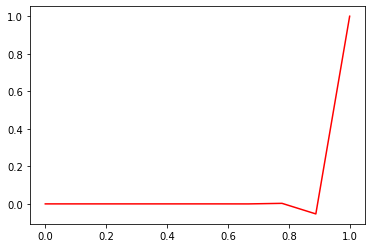

In [4]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
ticks1= np.linspace(0, 1, 10)
plt.plot(ticks1,sol1,"r")

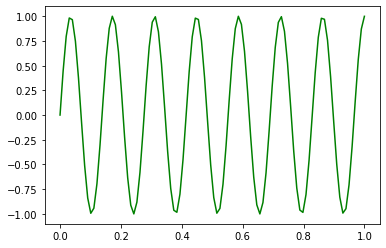

In [5]:
ticks2= np.linspace(0, 1, 100)
plt.plot(ticks2,sol2,"g")

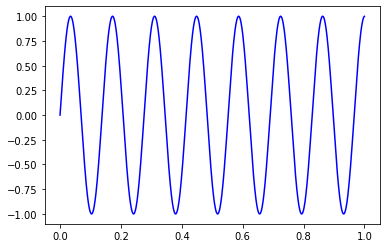

In [6]:
ticks3= np.linspace(0, 1, 1000)
plt.plot(ticks3,sol3,"b")

The approximate solution for N=100 and N=1000 looks same as the exact solution. While n=10 looks different compared with others. N=1000 should be the closest to the actual solution of the wave problem.

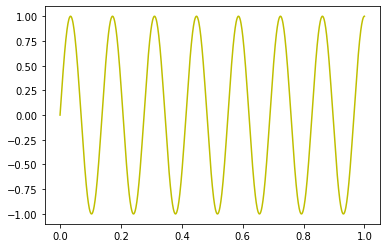

In [7]:
exactsol3=np.sin(29/2*math.pi*ticks3)
plt.plot(ticks3,exactsol3,"y")

***Compute this error for a range of values for N of your choice, for the method you wrote above. On axes that both use log scales, plot N against the error in your solution.***

0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


8.792878761780878e-05
4.308113665128788e-05
3.126352744880351e-05
1.8000984877385162e-05
2.4161333274628355e-05
8.860715733784164e-06
5.650328010045613e-06
7.53696940147125e-07
2.433350035035628e-05
1.1182914283657669e-05
3.1524339236428667e-06
5.008416158289175e-06
3.740683449024104e-05
4.074900032324802e-05
6.52626262420547e-05
6.167373716954583e-06
6.117725747742386e-05
6.621726385085472e-05
9.533547581731458e-05


Text(0, 0.5, 'Log(maxerror)')

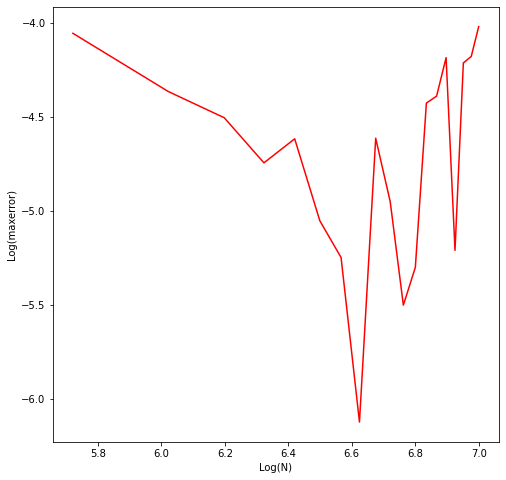

In [12]:
maxerror=[]
for N in range(2,10000000,500000):
    A,f=discretise_poisson(N)
    sol= spsolve(A, f)  
    ticks= np.linspace(0, 1, N)
    exactsol=np.sin(29/2*math.pi*ticks)
    error=[]

    for j in range(len(sol)):
        value=abs(sol[j]-exactsol[j])
        error.append(value)
    value2=max(error) 
    print(value2)  
    value3=np.log10(value2)
    maxerror.append(value3)
   
x=np.linspace(1,10000000,20)
fig = plt.figure(figsize=(8, 8))
plt.plot(np.log10(x),maxerror,"r")
plt.xlabel("Log(N)")
plt.ylabel("Log(maxerror)")


***measure the time taken to compute your approximation for your function. On axes that both use log scales, plot N against the time taken to compute a solution.***

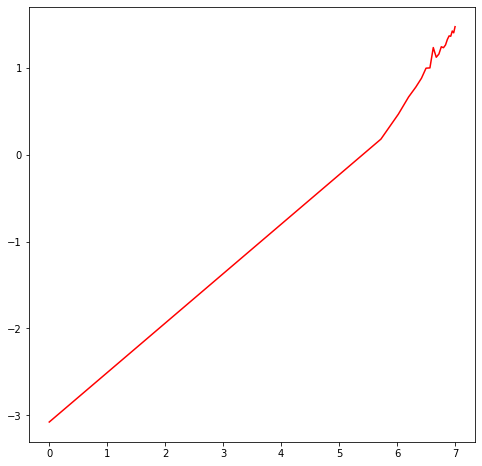

In [172]:
import time
time1=[]
for N in range(2,10000000,500000):
    start=time.time()
    A,f=discretise_poisson(N)
    sol= spsolve(A, f) 
    end=time.time()
    time1.append(np.log10(end-start))
x=np.linspace(1,10000000,20)
fig = plt.figure(figsize=(8, 8))
plt.plot(np.log10(x),time1,"r")


***pick a value of N that you would expect to give error of 10^−8 or less. Briefly (1-2 sentences) explain how you picked your value of N and predict how long the computation will take.***

I choose N=4000000 because the error is the smallest when logN is slightly larger than 6.6,10^6.6 is approximately 3981071,so i take N to be 4000000. The time taken may be a little bit larger than 10 seconds from the plot above.

***Compute the approximate solution with your value of N. Measure the time taken and the error, and briefly (1-2 sentences) comment on how these compare to your predictions. ***

In [29]:
import time
start=time.time()
N=4000000
A,f=discretise_poisson(N)
sol= spsolve(A, f) 
ticks= np.linspace(0, 1, N)
exactsol=np.sin(29/2*math.pi*ticks)
error=[]
for i in range(len(sol)):
  value=abs(sol[i]-exactsol[i])
  error.append(value)
maxerror=max(error)
end=time.time()
print(maxerror)
print(end-start)

2.2750520686308506e-05
13.618547201156616


It takes about 15 seconds to compute the solution which is close to my prediction. I think N=4000000 is large enough but the error still cannot reach 10^-8. Trying larger N may not be useful because the error seems to fluctuate as N becomes larger and larger.
The time taken for even larger N will be longer and will not be a reasonable time as well.

---



***Part 2: Solving the heat equation with GPU acceleration***

---



In [70]:
def heat_equation(N,t):
  h=1/N
  T=t*N
  u=np.zeros(N+1)
  u[0]=10
  u[N]=10
  for j in range(1,T+1):
    for i in range(1,N):
        u[i]=u[i]+(u[i-1]-2*u[i]+u[i+1])/(1000*h)
  return u

***plot the temperature of the rod at t=1, t=2 and t=10***


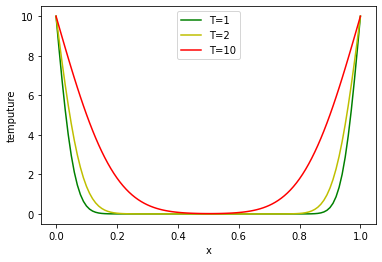

In [9]:
N=100
u1=heat_equation(N,1)
u2=heat_equation(N,2)
u3=heat_equation(N,10)
x=np.linspace(0,1,N+1)
plt.plot(x,u1,"g")
plt.plot(x,u2,"y")
plt.plot(x,u3,"r")
plt.xlabel("x")
plt.ylabel("temputure")
plt.legend(["T=1","T=2","T=10"])
plt.show()

***Briefly (1-2 sentences) comment on how you picked a value for N.***


i choose N to be 100 because if N is small, the plot will not look smooth enough. if N is big, the temperature of the rod increases very quickly so the plot is almost a straight line.

***Use numba.cuda to parallelise your implementation on a GPU.***

In [73]:
from numba import cuda

@cuda.jit
def heatequation(N,t,u):
  idx=cuda.threadIdx.x+cuda.blockDim.x*cuda.blockIdx.x
  h=1/N
  u[0]=u[N]=10
  for i in range(1,N*t+1):
    if idx<N and idx>0:
        u[idx]=u[idx]+(u[idx-1]-2*u[idx]+u[idx+1])/(1000*h)
  
N=30
t=10
blockDim=(32,8)
gridDim=(32,8)
u=np.zeros(N+1)
heatequation[gridDim,blockDim](N,t,u)

/usr/local/lib/python3.7/dist-packages/numba/cuda/cudadrv/devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


***Use your code to estimate the time at which the temperature of the midpoint of the rod first exceeds a temperature of 9.8. ***

In [75]:
N=10
for t in range (500):
  u=heat_equation(N,t)
  if u[5]>9.8:
    print("time is",t)
    print(u[5])
    break

time is 420
9.801488667567654


***Briefly (2-3 sentences) describe how you estimated this time***

Because the temperature of the midpoint of the rod increases as t becomes larger. For loop will be enough for me to calculate the time when the midpoint temperature first exceeds 9.8. In addition,different N may give different time when the temperature of the midpoint of the rod first exceed 9.8.